In [ ]:
library("readxl")
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
dustdata <- read_excel("dustdata.xlsx")

In [ ]:
head(dustdata)

yyyymmdd,area,finedust
<chr>,<chr>,<dbl>
전체,평균,38
2017-12-31,평균,63
2017-12-31,종로구,54
2017-12-31,중구,53
2017-12-31,용산구,60
2017-12-31,성동구,62


In [ ]:
str(dustdata)

tibble [3,173 × 3] (S3: tbl_df/tbl/data.frame)
 $ yyyymmdd: chr [1:3173] "전체" "2017-12-31" "2017-12-31" "2017-12-31" ...
 $ area    : chr [1:3173] "평균" "평균" "종로구" "중구" ...
 $ finedust: num [1:3173] 38 63 54 53 60 62 63 69 67 60 ...


In [ ]:
dim(dustdata)

[1] 3173    3

In [ ]:
# 성북구와 중구 데이터만 추출
dustdata_anal <- dustdata %>% filter(area %in% c("성북구","중구"))

In [ ]:
head(dustdata_anal)

yyyymmdd,area,finedust
<chr>,<chr>,<dbl>
2017-12-31,중구,53
2017-12-31,성북구,60
2017-12-30,중구,112
2017-12-30,성북구,128
2017-12-29,중구,81
2017-12-29,성북구,95


In [ ]:
#구체적인 데이터 현황 파악
#데이터 날짜 확인 

# count(dustdata_anal, yyyymmdd) %>% arrange(desc(n))  #모든 데이터가 2개 확인

count(dustdata_anal , area)

area,n
<chr>,<int>
성북구,122
중구,122


In [ ]:
#성북구와 중구에 데이터를 각각 분리
dust_sb <- subset(dustdata_anal, area == "성북구")
dust_jg <- subset(dustdata_anal, area == "중구")

#sub(데이터, 조건)
#dust_sb <- dustdata_anal %>% filter(area=="성북구")
#dust_jg <- dustdata_anal %>% filter(area=="중구")

In [ ]:
dust_sb

yyyymmdd,area,finedust
<chr>,<chr>,<dbl>
2017-12-31,성북구,60
2017-12-30,성북구,128
2017-12-29,성북구,95
2017-12-28,성북구,47
2017-12-27,성북구,27
2017-12-26,성북구,27
2017-12-25,성북구,29
2017-12-24,성북구,79
2017-12-23,성북구,116


In [ ]:
# install.packages("psych")
library(psych)

In [ ]:
describe(dust_sb$finedust)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,122,42.7459,20.13736,39.5,40.33673,17.0499,9,128,119,1.405036,2.932981,1.823151


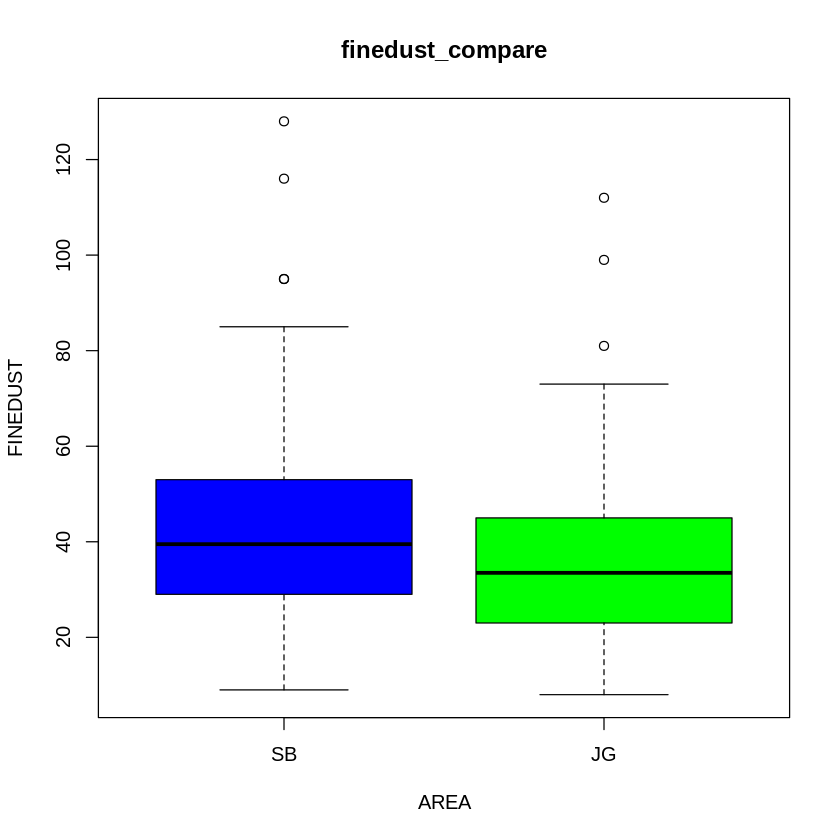

In [ ]:
#성북구와 중구의 미세먼지 분포확인
boxplot(dust_sb$finedust, dust_jg$finedust, main = "finedust_compare", xlab="AREA", names=c("SB","JG"),ylab="FINEDUST", col=c("blue","green"))


In [ ]:
t.test(data=dustdata_anal, finedust ~ area, var.qual = T)



	Welch Two Sample t-test

data:  finedust by area
t = 2.8347, df = 237.15, p-value = 0.004983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.085169 11.586962
sample estimates:
mean in group 성북구   mean in group 중구 
            42.74590             35.90984 


In [ ]:
# p-value = 0.004983으로 0.05보다 작다. 따라서 귀무가설 (성북구와 중구의 미세먼지 평균은 차이가 나지 않는다) 를 기각한다.
# ...차이가 있다는 대립가설을 채택한다.